In [153]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

Найдите коэффициенты $w$ и $b$, которые позволяют моделировать функцию "НЕ" при помощи одного нейрона со ступенчатой функцией активации step:  $ y(x)=step(w⋅x+b)$.  Пороговая функция, как в лекциях, понимается в биологическом смысле -- как функция
$f(x) = 0$ при  $x⩽0$
$f(x) = 1$ при $x>0$

Согласно таблице истинности функции NOT, к этой модели только два требования:   $y ( 1 ) = 0$, $y(1)=0.$  Ответ должен быть дан в форме:  0.05 1.234 (увы, эти числа не подойдут) или задача нерешаема.

Решение через систему уравнений:

$\begin{cases}w \cdot 0 + b > 0\\ w \cdot 1 + b <= 0  \end{cases} $

In [103]:
w = -1
b = 1

In [104]:
x = 0

In [105]:
y = w * x + b
y

1

In [155]:
# Перцептрон, обучение "Не" ("NOT")
x1x2_green = np.array([[0.], [0.], [0.]])
x1x2_red = np.array([[1.], [1.], [1.]])

x1x2 = np.concatenate((x1x2_green, x1x2_red))
labels = np.concatenate((np.ones(x1x2_green.shape[0]), -np.ones(x1x2_red.shape[0])))

indices = np.array(range(x1x2.shape[0]))
np.random.shuffle(indices)
x1x2 = x1x2[indices]
labels = labels[indices]

# случайные начальные веса
w1 = 0.5
b = 0.5

# разделяющая гиперплоскость (граница решений)
def lr_line(x1):
    return w1 * x1 + b

def decision_unit(value):
    return -1 if value <= 0 else 1

lines = [[w1, b]]

for max_iter in range(100):
    mismatch_count = 0
    for i, (x1) in enumerate(x1x2):
        value = lr_line(x1)
        true_label = int(labels[i])
        pred_label = decision_unit(value)
        if (true_label != pred_label):
            w1 = w1 + x1 * true_label
            b = b + true_label
            mismatch_count += 1

    if (mismatch_count > 0):
        lines.append([w1, b])
    else:
        break

print(f'w1 = {w1[0]}\nb = {b}')

w1 = -0.5
b = 0.5


Теперь попробуйте смоделировать нейрон И: введите $w_1,  w_2, b$  при которых нейрон, смоделированный функцией  $y ( x 1 , x 2 ) = s t e p ( w 1 ⋅ x 1 + w 2 ⋅ x 2 + b )$ будет удовлетворять таблице истинности функции AND:  $y ( 0 , 0 ) = 0,  y ( 0 , 1 ) = 0,  y ( 1 , 0 ) = 0$ и  $y ( 1 , 1 ) = 1$. Не забудьте, что у нас пороговая функция активации.

$ \begin{cases}
w_1 \cdot 1 + w_2 \cdot 1 + b > 0\\
w_1 \cdot 1 + w_2 \cdot 0 + b <= 0\\
w_1 \cdot 0 + w_2 \cdot 1 + b <= 0\\
w_1 \cdot 0 + w_2 \cdot 0 + b <= 0\\
\end{cases} $

In [146]:
w_1 = 1
w_2 = 1
b = -1

In [147]:
x_1 = [0, 1]
x_2 = [0, 1]

In [151]:
sum_res = w_1 * x_1[0] + w_2 * x_2[1] + b
sum_res

0

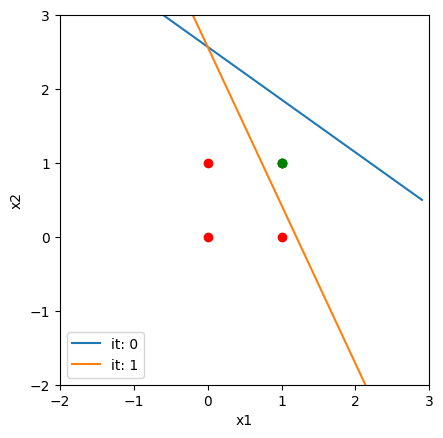

w1 = 1.5
w2 = 0.7
b = -1.8


In [158]:
# Перцептрон, обучение "И" ("AND")
# для воспроизводимости результатов
np.random.seed(0)

# генерируем диапазон зелёных точек, где 1
x1x2_green = np.array([[1., 1.], [1., 1.], [1., 1.]])

# генерируем диапазон красных точек, где 0
x1x2_red = np.array([[0., 0.], [0., 1.], [1., 0.]])

# объединяем все точки в единый массив
x1x2 = np.concatenate((x1x2_green, x1x2_red))

# проставляем классы: зелёные +1, красные -1
labels = np.concatenate((np.ones(x1x2_green.shape[0]), -np.ones(x1x2_red.shape[0])))

# хорошенько перемешиваем
indices = np.array(range(x1x2.shape[0]))
np.random.shuffle(indices)
x1x2 = x1x2[indices]
labels = labels[indices]

# выставляем случайные начальные веса
w1 = 0.5
w2 = 0.7
b = -1.8

# разделяющая гиперплоскость (граница решений)
def lr_line(x1, x2):
    return w1 * x1 + w2 * x2 + b

# ниже границы -1
# выше границы +1
def decision_unit(value):
    return -1 if value <= 0 else 1

# добавляем начальное разбиение в список
lines = [[w1, w2, b]]

for max_iter in range(100):
    # счётчик неверно классифицированных примеров
    # для ранней остановки
    mismatch_count = 0

    # по всем образцам
    for i, (x1, x2) in enumerate(x1x2):
        # считаем значение линейной комбинации на гиперплоскости
        value = lr_line(x1, x2)

        # класс из тренировочного набора (-1, +1)
        true_label = int(labels[i])

        # предсказанный класс (-1, +1)
        pred_label = decision_unit(value)

        # если имеет место ошибка классификации
        if (true_label != pred_label):
            # корректируем веса в сторону верного класса, т.е.
            # идём по нормали — (x1, x2) — в случае класса +1
            # или против нормали — (-x1, -x2) — в случае класса -1
            # т.к. нормаль всегда указывает в сторону +1
            w1 = w1 + x1 * true_label
            w2 = w2 + x2 * true_label

            # смещение корректируется по схожему принципу
            b = b + true_label

            # считаем количество неверно классифицированных примеров
            mismatch_count += 1

    # если была хотя бы одна коррекция
    if (mismatch_count > 0):
        # запоминаем границу решений
        lines.append([w1, w2, b])
    else:
        # иначе — ранняя остановка
        break

# рисуем точки (по последней границе решений)
for i, (x1, x2) in enumerate(x1x2):
    pred_label = decision_unit(lr_line(x1, x2))

    if (pred_label < 0):
        plt.plot(x1, x2, 'ro', color='red')
    else:
        plt.plot(x1, x2, 'ro', color='green')

# выставляем равное пиксельное разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')

# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')

# служебный диапазон для визуализации границы решений
x1_range = np.arange(-3, 3, 0.1)

# функционал, возвращающий границу решений в пригодном для отрисовки виде
# x2 = f(x1) = -(w1 * x1 + b) / w2
def f_lr_line(w1, w2, b):
    def lr_line(x1):
        return -(w1 * x1 + b) / w2
    return lr_line

# отрисовываем историю изменения границы решений
it = 0
for coeff in lines:
    lr_line = f_lr_line(coeff[0], coeff[1], coeff[2])
    plt.plot(x1_range, lr_line(x1_range), label = 'it: ' + str(it))
    it += 1

# зум
plt.axis([-2, 3, -2, 3])
# легенда
plt.legend(loc = 'lower left')
# любуемся графиком!
plt.show()

# выводим найденные значения для коэффициентов w1, w2 и b
print(f'w1 = {w1}\nw2 = {w2}\nb = {b}')

Теперь попробуйте смоделировать нейрон ИЛИ: введите $w_1,  w_2, b$  при которых нейрон, смоделированный функцией  $y ( x 1 , x 2 ) = s t e p ( w 1 ⋅ x 1 + w 2 ⋅ x 2 + b )$ будет удовлетворять таблице истинности функции AND:  $y ( 0 , 0 ) = 0,  y ( 0 , 1 ) = 1,  y ( 1 , 0 ) = 1$ и  $y ( 1 , 1 ) = 1$. Не забудьте, что у нас пороговая функция активации.


$ \begin{cases}
w_1 \cdot 1 + w_2 \cdot 1 + b > 0\\
w_1 \cdot 1 + w_2 \cdot 0 + b > 0\\
w_1 \cdot 0 + w_2 \cdot 1 + b > 0\\
w_1 \cdot 0 + w_2 \cdot 0 + b <= 0\\
\end{cases} $

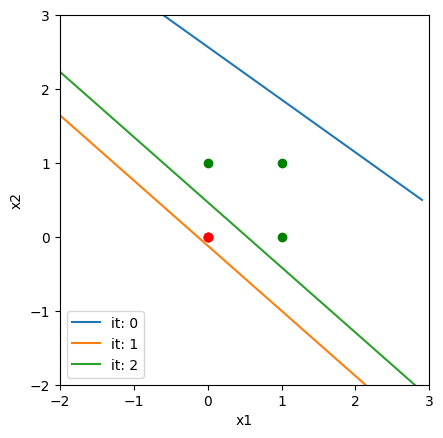

w1 = 1.5
w2 = 1.7
b = -0.8


In [286]:
# Перцептрон, обучение "ИЛИ" ("OR")
# для воспроизводимости результатов
np.random.seed(17)

# генерируем диапазон зелёных точек, где 1
x1x2_green = np.array([[1., 1.], [0., 1.], [1., 0.]])

# генерируем диапазон красных точек, где 0
x1x2_red = np.array([[0., 0.], [0., 0.], [0., 0.]])

# объединяем все точки в единый массив
x1x2 = np.concatenate((x1x2_green, x1x2_red))

# проставляем классы: зелёные +1, красные -1
labels = np.concatenate((np.ones(x1x2_green.shape[0]), -np.ones(x1x2_red.shape[0])))

# хорошенько перемешиваем
indices = np.array(range(x1x2.shape[0]))
np.random.shuffle(indices)
x1x2 = x1x2[indices]
labels = labels[indices]

# выставляем случайные начальные веса
w1 = 0.5
w2 = 0.7
b = -1.8

# разделяющая гиперплоскость (граница решений)
def lr_line(x1, x2):
    return w1 * x1 + w2 * x2 + b

# ниже границы -1
# выше границы +1
def decision_unit(value):
    return -1 if value <= 0 else 1

# добавляем начальное разбиение в список
lines = [[w1, w2, b]]

for max_iter in range(100):
    # счётчик неверно классифицированных примеров
    # для ранней остановки
    mismatch_count = 0

    # по всем образцам
    for i, (x1, x2) in enumerate(x1x2):
        # считаем значение линейной комбинации на гиперплоскости
        value = lr_line(x1, x2)

        # класс из тренировочного набора (-1, +1)
        true_label = int(labels[i])

        # предсказанный класс (-1, +1)
        pred_label = decision_unit(value)

        # если имеет место ошибка классификации
        if (true_label != pred_label):
            # корректируем веса в сторону верного класса, т.е.
            # идём по нормали — (x1, x2) — в случае класса +1
            # или против нормали — (-x1, -x2) — в случае класса -1
            # т.к. нормаль всегда указывает в сторону +1
            w1 = w1 + x1 * true_label
            w2 = w2 + x2 * true_label

            # смещение корректируется по схожему принципу
            b = b + true_label

            # считаем количество неверно классифицированных примеров
            mismatch_count += 1

    # если была хотя бы одна коррекция
    if (mismatch_count > 0):
        # запоминаем границу решений
        lines.append([w1, w2, b])
    else:
        # иначе — ранняя остановка
        break

# рисуем точки (по последней границе решений)
for i, (x1, x2) in enumerate(x1x2):
    pred_label = decision_unit(lr_line(x1, x2))

    if (pred_label < 0):
        plt.plot(x1, x2, 'ro', color='red')
    else:
        plt.plot(x1, x2, 'ro', color='green')

# выставляем равное пиксельное разрешение по осям
plt.gca().set_aspect('equal', adjustable='box')

# проставляем названия осей
plt.xlabel('x1')
plt.ylabel('x2')

# служебный диапазон для визуализации границы решений
x1_range = np.arange(-3, 3, 0.1)

# функционал, возвращающий границу решений в пригодном для отрисовки виде
# x2 = f(x1) = -(w1 * x1 + b) / w2
def f_lr_line(w1, w2, b):
    def lr_line(x1):
        return -(w1 * x1 + b) / w2
    return lr_line

# отрисовываем историю изменения границы решений
it = 0
for coeff in lines:
    lr_line = f_lr_line(coeff[0], coeff[1], coeff[2])
    plt.plot(x1_range, lr_line(x1_range), label = 'it: ' + str(it))
    it += 1

# зум
plt.axis([-2, 3, -2, 3])
# легенда
plt.legend(loc = 'lower left')
# любуемся графиком!
plt.show()

# выводим найденные значения для коэффициентов w1, w2 и b
print(f'w1 = {w1}\nw2 = {w2}\nb = {b}')

Теперь попробуйте смоделировать нейрон ИСКЛЮЧАЮЩЕЕ ИЛИ: введите $w_1,  w_2, b$  при которых нейрон, смоделированный функцией  $y ( x 1 , x 2 ) = s t e p ( w 1 ⋅ x 1 + w 2 ⋅ x 2 + b )$ будет удовлетворять таблице истинности функции AND:  $y ( 0 , 0 ) = 0,  y ( 0 , 1 ) = 1,  y ( 1 , 0 ) = 1$ и  $y ( 1 , 1 ) = 0$. Не забудьте, что у нас пороговая функция активации.


In [ ]:
# neuron(neuron(x2 - x1) + neuron(x1 - x2))

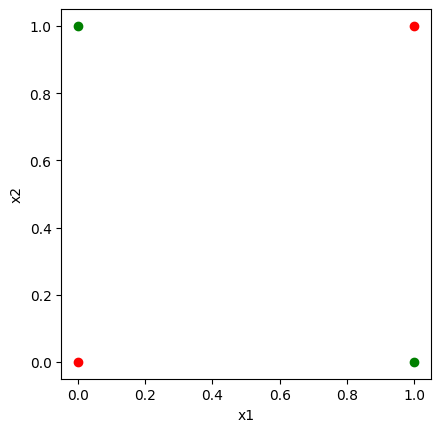

In [313]:
x1x2 = np.array([[0,0],[1,0],[0,1],[1,1]])

def neuron(value):
    return -1 if value < 0 else 1

for x1, x2 in x1x2:
    value = neuron(neuron(-1*x1 + 1*x2 - 0.5) + neuron(1*x1 - 1*x2 - 0.5))

    if (value == 0):
        plt.plot(x1, x2, 'o', color="blue")
    elif (value > 0):
        plt.plot(x1, x2, 'o', color="green")
    elif (value < 0):
        plt.plot(x1, x2, 'o', color="red")

plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

In [314]:
def neuron(value):
    return 0 if value <=0 else 1

for x1, x2 in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    res = neuron(neuron(-2 * x1 + 2 * x2 - 1) + neuron(2 * x1 - 2 * x2 - 1) + 0)
    print(res)

0
1
1
0
